# Exploratory Data Analysis
 #### English Premier League - Insights  
English Premier League is the most popular professional football league in the world. There are 20 teams from England fighting for the title every season. I tried to analyse the league quantitively and look if there can be some interesting insights that are hidden on our plain sight.

![photo](1401220.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import opendatasets as od

In [2]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

In [3]:
pd.set_option("display.max_columns", None)

## Turn Off Chained Assignments Warning ----- >>
pd.options.mode.chained_assignment = None 

In [4]:
od.download("https://www.kaggle.com/irkaal/english-premier-league-results")

Skipping, found downloaded files in ".\english-premier-league-results" (use force=True to force download)


In [5]:
df = pd.read_csv('english-premier-league-results/results.csv', encoding='windows-1252') #

In [6]:
df.shape

(10874, 23)

In [7]:
df.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [8]:
df['TotalMatchGoal'] = df['FTHG'] + df['FTAG']

In [9]:
df = df[(df['Season'] != '2021-22')]
df = df[(df['Season'] != '1994-95')]
df = df[(df['Season'] != '1993-94')]

In [10]:
df['FTR'].replace({"H": "Home","A": "Away", "D": "Draw"}, inplace=True)

In [11]:
df.sample(5) 

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,TotalMatchGoal
6814,2010-11,2011-01-01T00:00:00Z,Birmingham,Arsenal,0,3,Away,0.0,1.0,A,P Walton,2.0,18.0,1.0,11.0,4.0,5.0,7.0,9.0,3.0,1.0,0.0,0.0,3
7626,2012-13,2013-02-02T00:00:00Z,Fulham,Man United,0,1,Away,0.0,0.0,D,K Friend,15.0,13.0,8.0,8.0,5.0,8.0,8.0,15.0,1.0,1.0,0.0,0.0,1
5272,2006-07,2006-12-13T00:00:00Z,Wigan,Arsenal,0,1,Away,0.0,0.0,D,R Styles,15.0,9.0,7.0,3.0,4.0,7.0,10.0,7.0,1.0,0.0,0.0,0.0,1
8805,2015-16,2016-03-05T00:00:00Z,Newcastle,Bournemouth,1,3,Away,0.0,1.0,A,P Tierney,14.0,16.0,3.0,5.0,5.0,4.0,13.0,8.0,1.0,3.0,0.0,0.0,4
1919,1997-98,1998-01-31T00:00:00Z,Man United,Leicester,0,1,Away,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


  
  ---

### Goals Per Season
Which season has the highest number of goals?  
What are the top 5 seasons with most goals?

In [12]:
TMG = df[['Season','TotalMatchGoal']]
TMG = TMG.groupby(by=['Season']).mean()
TMG.tail(1)

,TotalMatchGoal
Season,
2020-21,2.694737


In [13]:
TMG = df[['Season','TotalMatchGoal']]
TMG = TMG.groupby(by=['Season']).sum()
TMG.tail(1)

,TotalMatchGoal
Season,
2020-21,1024


In [14]:
TMG = df[['Season','TotalMatchGoal']]
TMG = TMG.groupby(by=['Season']).sum()
TMG = TMG.sort_values(['TotalMatchGoal'], ascending=False)
TMG = TMG.head(5) 
TMG

,TotalMatchGoal
Season,
2018-19,1072
2011-12,1066
2016-17,1064
2010-11,1063
2012-13,1063


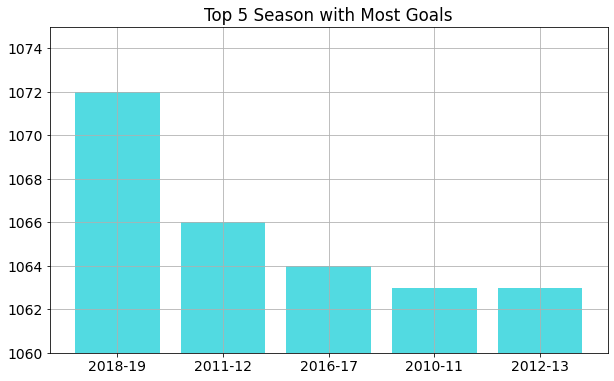

In [82]:
plt.figure(figsize=(10,6))
#plt.xticks(rotation=75)
plt.grid() 
plt.ylim(1060,1075)
plt.title("Top 5 Season with Most Goals") 
plt.bar(TMG.index, TMG.TotalMatchGoal, color='#52DAE1');

> Top 5 seasons with the highest goals are 18-19, 11-12, 16-17, 10-11, 12-13  
Highest goal socred in the season 2018-19. Which is 1072  
Total goal scored in the latest season (2020-21) is 1024. Average goals per game in 20-21 is 2.69

  
  ---

### Advantages of Home Team
Lets find out the winning distribution of Home and Away teams

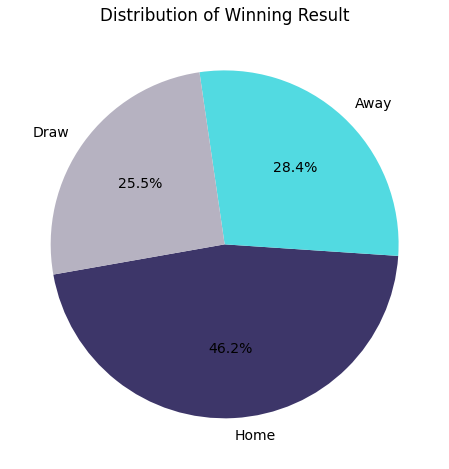

In [73]:
Dis = df.FTR.value_counts()

plt.figure(figsize=(10,8))
plt.grid()
plt.title('Distribution of Winning Result')
plt.pie(Dis, labels=Dis.index, colors=['#3D3669','#52DAE1','#B6B2C1'] ,autopct='%1.1f%%', startangle=190);

> The pie chart clearly shows that Home teams have the advantages in winning game.  
46% times Home teams win the match, they only lose points in 28% of the games.

---

### Home Goals vs Away Goals
Let's see the comparison of Home and Away goals over the seasons

In [64]:
HVA = df[['Season', 'FTHG', 'FTAG']]
HVA = HVA.groupby('Season').sum()

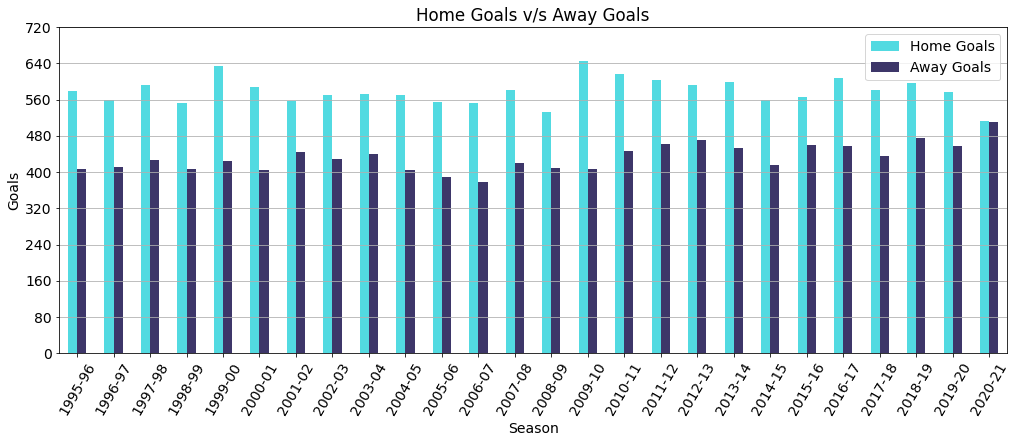

In [74]:
HVA.plot(kind='bar',figsize=(17,6),yticks=np.arange(0,721,80),color=['#52DAE1', '#3D3669'])
plt.grid(axis='y')
plt.ylabel('Goals')
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals v/s Away Goals")
plt.xticks(rotation=60)
plt.show()

>In all seasons , home goals are greater than away goals. Which indicates that the Home ground has always an advantage in the competition.

---

### Most Goals by Top Teams
Lets find out top 5 most goal scoring teams.

In [17]:
dfH = df[['Season', 'HomeTeam', 'FTHG', 'FTR']]
dfH.columns=['Season', 'Team', 'Goal', 'Result']
dfH['Result'].replace({"Home": "Win", "Away": "Lost"}, inplace=True)

In [18]:
dfA = df[['Season', 'AwayTeam', 'FTAG', 'FTR']]
dfA.columns=['Season', 'Team', 'Goal', 'Result']
dfA['Result'].replace({"Away": "Win", "Home": "Lost"}, inplace=True) 

In [19]:
dfT = pd.concat([dfH, dfA])

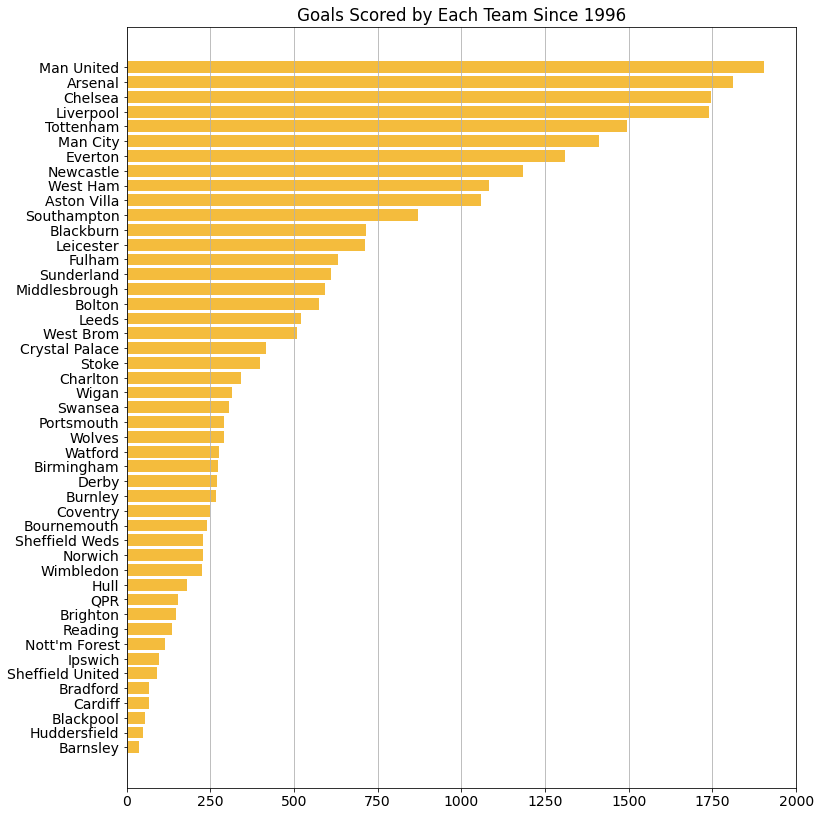

In [105]:
TG = dfT[['Team','Goal']]
TG = TG.groupby(by=['Team']).sum()
TG = TG.sort_values(['Goal'], ascending=True)

plt.figure(figsize=(12,14))
#plt.xticks(rotation=75)
plt.grid(axis='x') 
plt.xlim(0,2000)
plt.title("Goals Scored by Each Team Since 1996") 
plt.barh(TG.index, TG.Goal, color='#F4BC3D'); 

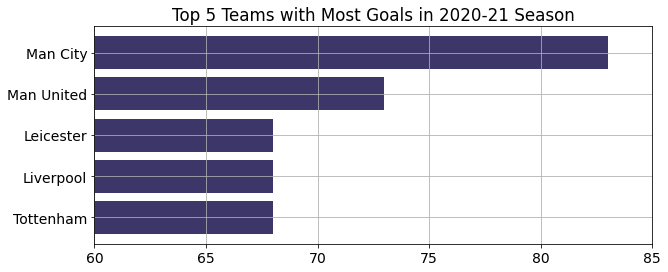

In [86]:
TG2 = dfT[(dfT['Season'] == '2020-21')]
TG2 = TG2[['Team','Goal']]
TG2 = TG2.groupby(by=['Team']).sum()
TG2 = TG2.sort_values(['Goal'], ascending=True)
TG2 = TG2.tail(5) 

plt.figure(figsize=(10,4))
#plt.xticks(rotation=75)
plt.grid() 
plt.xlim(60,85)
plt.title("Top 5 Teams with Most Goals in 2020-21 Season") 
plt.barh(TG2.index, TG2.Goal, color='#3D3669'); 

> Above analysis shows that, since 1996 Manchester United is the highest goal scorer team. They scored almost 1990 goals till 2021. Where, in season 2020-21 Manchester City is in the top position in scoring.

---

### Premier League Titles  
Who is the highest title winner?  
Which team won the latest premier league title?

In [22]:
dfT['Points'] = np.where(dfT['Result']=='Win', 3, 0)
dfT['Points'] = np.where(dfT['Result']=='Draw', 1, dfT['Points'])

In [23]:
Titl = dfT[['Season', 'Team', 'Points']]
Titl = Titl.groupby(by=['Season','Team']).sum().reset_index()
Titl = Titl.sort_values(['Season', 'Points'])
Titl = Titl.groupby('Season').tail(1)

In [24]:
Titl = Titl['Team'].value_counts(ascending=True) 

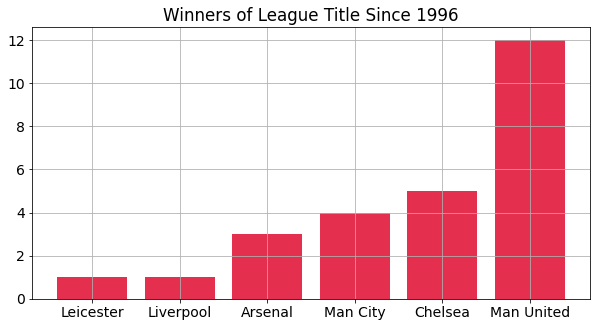

In [25]:
plt.figure(figsize=(10,5)) 
plt.grid() 
plt.title("Winners of League Title Since 1996") 
plt.bar(Titl.index, Titl, color='#E52F4E');

In [26]:
tl21 = dfT[(dfT['Season'] == '2020-21')]
tl21 = tl21[['Team','Points']]
tl21 = tl21.groupby(by=['Team']).sum()
tl21 = tl21.sort_values(['Points'], ascending=True)

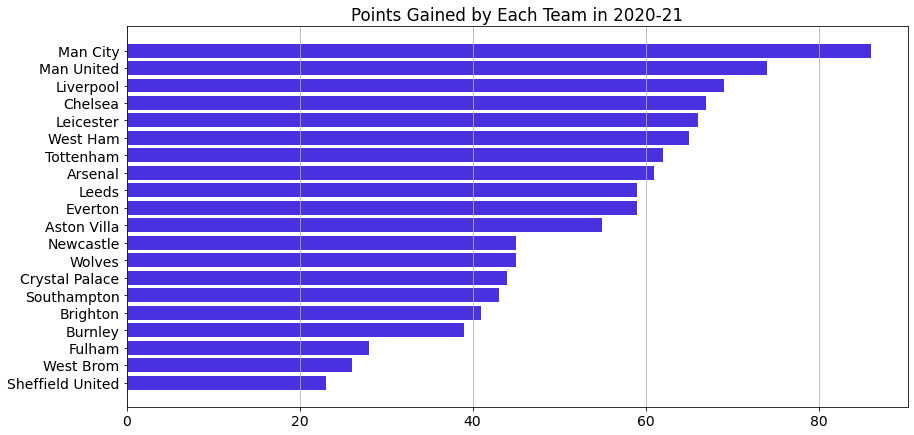

In [90]:
plt.figure(figsize=(14,7)) 
plt.grid(axis='x') 
plt.title("Points Gained by Each Team in 2020-21") 
plt.barh(tl21.index, tl21.Points, color='#4931E0');

> Machester United won the most (12) league titles since 1996. Also, Chelsea with 5 titles in second position and Man City with 4 standing in the 3rd position.  
The winner of latest season 2020-21 is Manchester City. Where, Sheffield Unt. stands at the last of points table.  


---

### Points Earned by The Champions

In [28]:
pnts = dfT[['Season', 'Team', 'Points']]
pnts = pnts.groupby(by=['Season','Team']).sum().reset_index()
pnts = pnts.sort_values(['Season', 'Points'])
pnts = pnts.groupby('Season').tail(1).reset_index()
pnts = pnts.drop(['index'], axis=1)
pnts.head(5)

,Season,Team,Points
0,1995-96,Man United,82
1,1996-97,Man United,75
2,1997-98,Arsenal,78
3,1998-99,Man United,79
4,1999-00,Man United,91


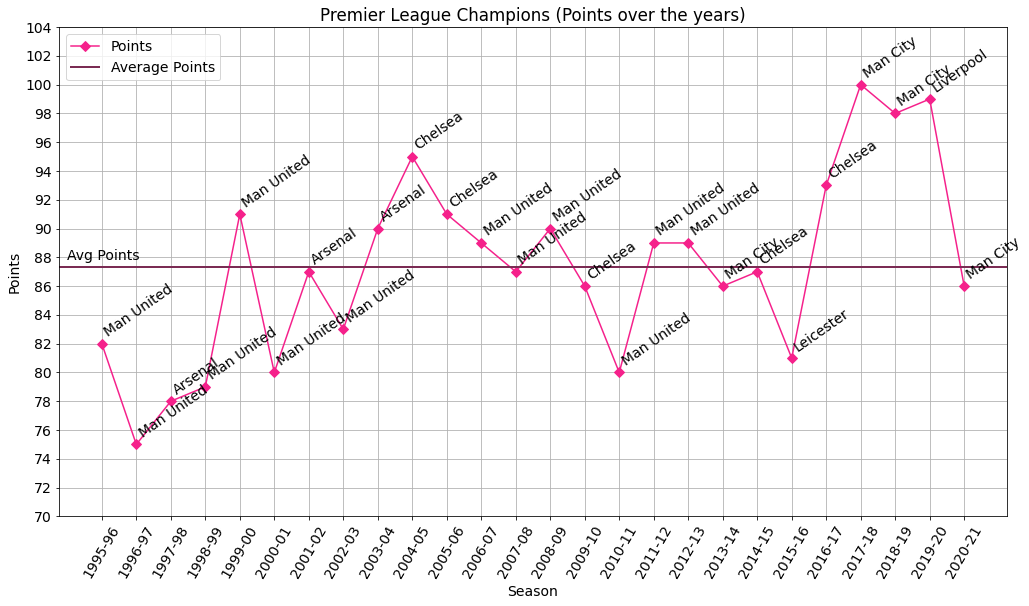

In [52]:
ax = pnts.plot(kind='line',color='#F5218B',y='Points',grid=True,label='Points',figsize=(17,9),linestyle='-',marker='D',markevery=1,markersize=7, fillstyle='full',markerfacecolor='#F5218B')
plt.axhline(y=pnts['Points'].mean(), color='#7B2C54',label='Average Points',linewidth=2)
plt.yticks(np.arange(70,105,2))
plt.annotate('Avg Points',(-1,pnts['Points'].mean()+0.5))

a=0
for index,row in pnts.iterrows():
    b=row.Points
    plt.annotate(row.Team,(a,b+.5),fontsize=14, rotation=35)
    a=a+1

plt.xlabel('Season')
plt.ylabel('Points') 
plt.title('Premier League Champions (Points over the years)')
plt.legend(loc=2)
plt.xticks(pnts.index,rotation=60)
ax.set_xticklabels(pnts['Season']) 
plt.show()

> Man City secured first place with maximum points (100) in Season 2017-18  
Man Utd become champion with the minimum points (75) in Season 1996-97

---

### Goals by the Chamions  
Let's find out the number of goals scored in each season by the title winners

In [38]:
gls = dfT[['Season', 'Team', 'Points', 'Goal']]
gls = gls.groupby(by=['Season','Team']).sum().reset_index()
gls = gls.sort_values(['Season', 'Points'])
gls = gls.groupby('Season').tail(1).reset_index()
gls = gls.drop(['index'], axis=1)
gls.head(5)

,Season,Team,Points,Goal
0,1995-96,Man United,82,73
1,1996-97,Man United,75,76
2,1997-98,Arsenal,78,68
3,1998-99,Man United,79,80
4,1999-00,Man United,91,97


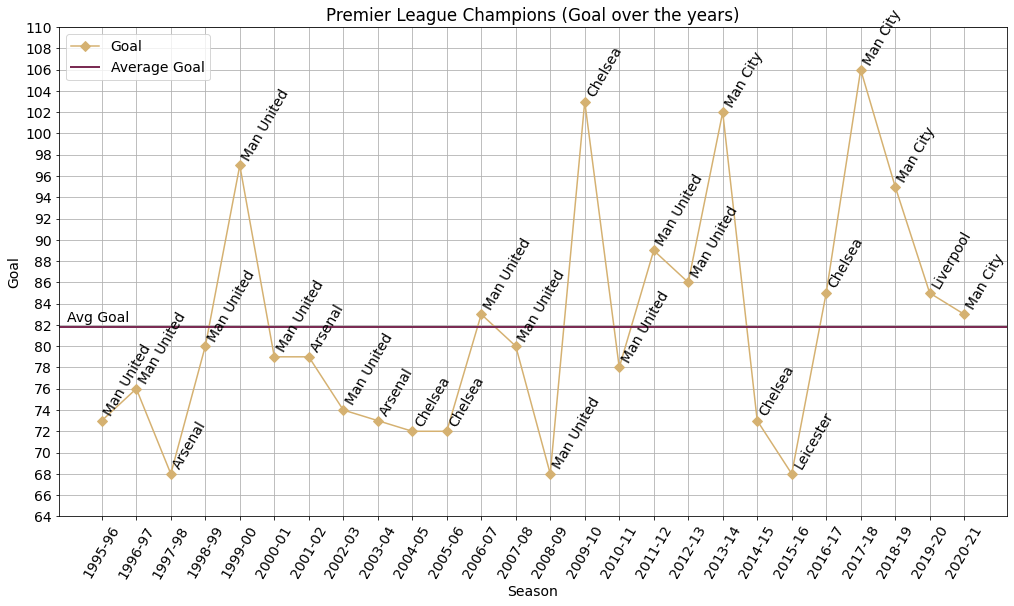

In [48]:
ax = gls.plot(kind='line',color='#D5B171',y='Goal',grid=True,label='Goal',figsize=(17,9),linestyle='-',marker='D',markevery=1,markersize=7, fillstyle='full',markerfacecolor='#D5B171')
plt.axhline(y=gls['Goal'].mean(), color='#7B2C54',label='Average Goal',linewidth=2)
plt.yticks(np.arange(64,112,2))
plt.annotate('Avg Goal',(-1,gls['Goal'].mean()+0.5))

a=0
for index,row in gls.iterrows():
    b=row.Goal
    plt.annotate(row.Team,(a,b+.5),fontsize=14,rotation=60)
    a=a+1

plt.xlabel('Season')
plt.ylabel('Goal') 
plt.title('Premier League Champions (Goal over the years)')
plt.legend(loc=2)
plt.xticks(gls.index,rotation=60)
ax.set_xticklabels(gls['Season']) 
plt.show()

> Among the champions Man City secured the top position in 17-18 with the maximum number of Goals (106). Where the average number of goals among the champions over the years is 82.   

---

### Season 2020-21 Insights  
Let's find out some detail insights about the latest season!

In [30]:
S21 = df[(df['Season'] == '2020-21')]

S21H = S21[['HomeTeam', 'HST', 'HF', 'HR']]
S21H.columns=['Team', 'ShotOnTarget', 'Fouls', 'RedCard']

S21A = S21[['AwayTeam', 'AST', 'AF', 'AR']]
S21A.columns=['Team', 'ShotOnTarget', 'Fouls', 'RedCard']

S21 = pd.concat([S21H, S21A])

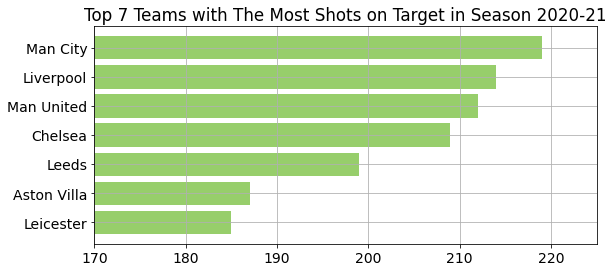

In [91]:
S21ST = S21[['Team', 'ShotOnTarget']]
S21ST = S21ST.groupby(by=['Team']).sum().reset_index()
S21ST = S21ST.sort_values('ShotOnTarget', ascending=True).tail(7)

plt.figure(figsize=(9,4)) 
plt.grid() 
plt.xlim(170,225)
plt.title("Top 7 Teams with The Most Shots on Target in Season 2020-21") 
plt.barh(S21ST.Team, S21ST.ShotOnTarget, color='#97CE6B');

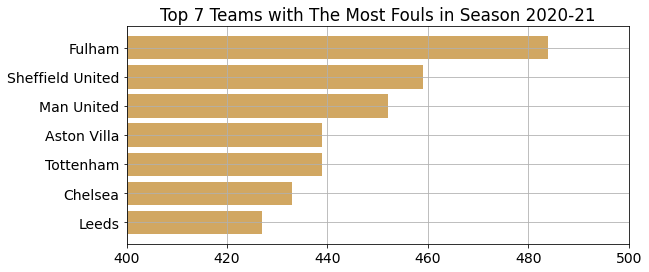

In [32]:
S21F = S21[['Team', 'Fouls']]
S21F = S21F.groupby(by=['Team']).sum().reset_index()
S21F = S21F.sort_values('Fouls', ascending=True).tail(7)

plt.figure(figsize=(9,4)) 
plt.grid() 
plt.xlim(400,500)
plt.title("Top 7 Teams with The Most Fouls in Season 2020-21") 
plt.barh(S21F.Team, S21F.Fouls, color='#D1A762');

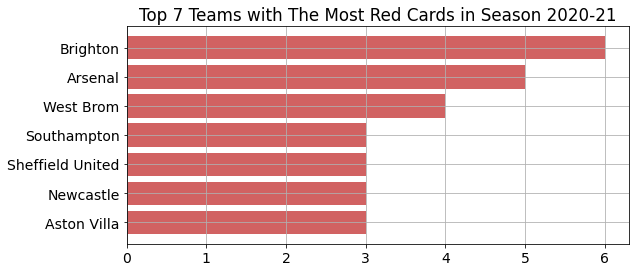

In [33]:
S21R = S21[['Team', 'RedCard']]
S21R = S21R.groupby(by=['Team']).sum().reset_index()
S21R = S21R.sort_values('RedCard', ascending=True).tail(7)

plt.figure(figsize=(9,4)) 
plt.grid() 
#plt.xlim(400,500)
plt.title("Top 7 Teams with The Most Red Cards in Season 2020-21") 
plt.barh(S21R.Team, S21R.RedCard, color='#D16262');

>In Season 20-21,  
ManCity attempted the maximum shots on target (around 220)  
Fulham with the highest number of fouls (around 480)  
Brighton got the maximum number of Red Cards (6)